In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from Data_Prep import *

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, ConfusionMatrixDisplay


In [2]:
# Defining the file path for CAN datasets
in_can = "/media/arupreza/Assets/Data/Dataset_Yoonji/CAN/"

In [3]:
# List all files in the directory and store them in a variable
def get_file_list(directory):
    try:
        files = sorted(os.listdir(directory))  # Sort the files for consistent indexing
        print(f"Files in '{directory}':")
        for i, file in enumerate(files):
            print(f"{i + 1}: {file}")  # Display index for each file
        return files
    except FileNotFoundError:
        print(f"The directory '{directory}' does not exist.")
        return []
    except PermissionError:
        print(f"Permission denied for accessing the directory '{directory}'.")
        return []

In [4]:
# Main workflow
file_list = get_file_list(in_can)  # Get all filenames

Files in '/media/arupreza/Assets/Data/Dataset_Yoonji/CAN/':
1: normal_CAN.trc
2: normal_CAN_30(1).trc
3: normal_CAN_30(10).trc
4: normal_CAN_30(2).trc
5: normal_CAN_30(3).trc
6: normal_CAN_30(4).trc
7: normal_CAN_30(5).trc
8: normal_CAN_30(6).trc
9: normal_CAN_30(7).trc
10: normal_CAN_30(8).trc
11: normal_CAN_30(9).trc
12: replay_attack1_CAN_60(1).trc
13: replay_attack1_CAN_60(2).trc
14: replay_attack1_CAN_60(3).trc
15: replay_attack1_CAN_60(4).trc
16: replay_attack1_CAN_60(5).trc
17: replay_attack2_CAN_60(1).trc
18: replay_attack2_CAN_60(2).trc
19: replay_attack2_CAN_60(3).trc
20: replay_attack2_CAN_60(4).trc
21: replay_attack2_CAN_60(5).trc


In [5]:
cols = ["Time_Offset", "CAN_ID"] + [f'Payload_{i}' for i in range(1, 9)] + ["Time_Gap"]

In [6]:
# Define the function
def process_file(file_name, cols):

    # Prepend the directory path to the file name
    file_path = os.path.join(in_can, file_name)  # Full file path 

    # Convert the file into a DataFrame
    a = Convert_to_df(file_path)
    
    # Convert 'Time_Offset' to numeric
    a["Time_Offset"] = pd.to_numeric(a["Time_Offset"], errors="coerce")
    
    # Calculate the time gap
    a["Time_Gap"] = a["Time_Offset"].diff(1)
    
    # Reset the index
    a = a.reset_index(drop=True)
    
    # Select specified columns
    a = a[cols]
    
    # Replace NaN values with -1
    a = a.fillna(-0.001)

    a = a[a["CAN_ID"] == "0510"]
    
    return a

In [7]:
# Specify the file name
normal_CAN_30_1 = process_file("normal_CAN_30(1).trc", cols)
normal_CAN_30_1["Label"] = [0] * len(normal_CAN_30_1)

# Specify the file name
normal_CAN_30_2 = process_file("normal_CAN_30(2).trc", cols)
normal_CAN_30_2["Label"] = [0] * len(normal_CAN_30_2)

# Specify the file name
normal_CAN_30_3 = process_file("normal_CAN_30(3).trc", cols)
normal_CAN_30_3["Label"] = [0] * len(normal_CAN_30_3)

# Specify the file name
normal_CAN_30_4 = process_file("normal_CAN_30(4).trc", cols)
normal_CAN_30_4["Label"] = [0] * len(normal_CAN_30_4)

# Specify the file name
normal_CAN_30_5 = process_file("normal_CAN_30(5).trc", cols)
normal_CAN_30_5["Label"] = [0] * len(normal_CAN_30_5)

# Specify the file name
normal_CAN_30_6 = process_file("normal_CAN_30(6).trc", cols)
normal_CAN_30_6["Label"] = [0] * len(normal_CAN_30_6)

# Specify the file name
normal_CAN_30_7 = process_file("normal_CAN_30(7).trc", cols)
normal_CAN_30_7["Label"] = [0] * len(normal_CAN_30_7)

# Specify the file name
normal_CAN_30_8 = process_file("normal_CAN_30(8).trc", cols)
normal_CAN_30_8["Label"] = [0] * len(normal_CAN_30_8)

# Specify the file name
normal_CAN_30_9 = process_file("normal_CAN_30(9).trc", cols)
normal_CAN_30_9["Label"] = [0] * len(normal_CAN_30_9)

# Specify the file name
normal_CAN_30_10 = process_file("normal_CAN_30(10).trc", cols)
normal_CAN_30_10["Label"] = [0] * len(normal_CAN_30_10)


In [8]:
normal_CAN_30_10.columns

Index(['Time_Offset', 'CAN_ID', 'Payload_1', 'Payload_2', 'Payload_3',
       'Payload_4', 'Payload_5', 'Payload_6', 'Payload_7', 'Payload_8',
       'Time_Gap', 'Label'],
      dtype='object')

In [9]:
# Assuming process_file and cols are already defined
# Process files and add a "Label" column
normal_CAN_files = [
    "normal_CAN_30(1).trc", "normal_CAN_30(2).trc", "normal_CAN_30(3).trc",
    "normal_CAN_30(4).trc", "normal_CAN_30(5).trc", "normal_CAN_30(6).trc",
    "normal_CAN_30(7).trc", "normal_CAN_30(8).trc", "normal_CAN_30(9).trc",
    "normal_CAN_30(10).trc"
]

# Process all files into a list of DataFrames
dataframes = []
for file in normal_CAN_files:
    df = process_file(file, cols)
    df["Label"] = 0  # Assign label
    dataframes.append(df)

# Combine all DataFrames into one
All_Normal_df = pd.concat(dataframes, ignore_index=True)

In [10]:
# Specify the file name
replay_attack1_CAN_60_1 = process_file("replay_attack1_CAN_60(1).trc", cols)
replay_attack1_CAN_60_1["Label"] = [1] * len(replay_attack1_CAN_60_1)

# Specify the file name
replay_attack1_CAN_60_2 = process_file("replay_attack1_CAN_60(2).trc", cols)
replay_attack1_CAN_60_2["Label"] = [1] * len(replay_attack1_CAN_60_2)

# Specify the file name
replay_attack1_CAN_60_3 = process_file("replay_attack1_CAN_60(3).trc", cols)
replay_attack1_CAN_60_3["Label"] = [1] * len(replay_attack1_CAN_60_3)

# Specify the file name
replay_attack1_CAN_60_4 = process_file("replay_attack1_CAN_60(4).trc", cols)
replay_attack1_CAN_60_4["Label"] = [1] * len(replay_attack1_CAN_60_4)

# Specify the file name
replay_attack1_CAN_60_5 = process_file("replay_attack1_CAN_60(5).trc", cols)
replay_attack1_CAN_60_5["Label"] = [1] * len(replay_attack1_CAN_60_5)

# Specify the file name
replay_attack1_CAN_60_6 = process_file("replay_attack2_CAN_60(1).trc", cols)
replay_attack1_CAN_60_6["Label"] = [1] * len(replay_attack1_CAN_60_6)

# Specify the file name
replay_attack1_CAN_607 = process_file("replay_attack2_CAN_60(2).trc", cols)
replay_attack1_CAN_607["Label"] = [1] * len(replay_attack1_CAN_607)

# Specify the file name
replay_attack1_CAN_60_8 = process_file("replay_attack2_CAN_60(3).trc", cols)
replay_attack1_CAN_60_8["Label"] = [1] * len(replay_attack1_CAN_60_8)

# Specify the file name
replay_attack1_CAN_60_9 = process_file("replay_attack2_CAN_60(4).trc", cols)
replay_attack1_CAN_60_9["Label"] = [1] * len(replay_attack1_CAN_60_9)

# Specify the file name
replay_attack1_CAN_60_10 = process_file("replay_attack2_CAN_60(5).trc", cols)
replay_attack1_CAN_60_10["Label"] = [1] * len(replay_attack1_CAN_60_10)


In [11]:
# Concatenate all the DataFrames into one
all_replay_attacks1 = pd.concat([
    replay_attack1_CAN_60_1,
    replay_attack1_CAN_60_2,
    replay_attack1_CAN_60_3,
    replay_attack1_CAN_60_4,
    replay_attack1_CAN_60_5
], axis=0, ignore_index=True)

# Concatenate all the DataFrames into one
all_replay_attacks2 = pd.concat([
    replay_attack1_CAN_60_6,
    replay_attack1_CAN_607,
    replay_attack1_CAN_60_8,
    replay_attack1_CAN_60_9,
    replay_attack1_CAN_60_10
], axis=0, ignore_index=True)

In [12]:
All_Normal_df = All_Normal_df[["Time_Offset", "Payload_1",	"Payload_2",	"Payload_3",	"Payload_4",	"Payload_5",	"Payload_6",	"Payload_7",	"Payload_8",	"Time_Gap",	"Label"]]
all_replay_attacks1 = all_replay_attacks1[["Time_Offset", "Payload_1",	"Payload_2",	"Payload_3",	"Payload_4",	"Payload_5",	"Payload_6",	"Payload_7",	"Payload_8",	"Time_Gap",	"Label"]]
all_replay_attacks2 = all_replay_attacks2[["Time_Offset", "Payload_1",	"Payload_2",	"Payload_3",	"Payload_4",	"Payload_5",	"Payload_6",	"Payload_7",	"Payload_8",	"Time_Gap",	"Label"]]

In [44]:
def plot_payload_comparison(payload_column, payload_label):

    # Plot Payload values for Normal and Replay Attack datasets
    plt.figure(figsize=(12, 6))

    # Plot for Normal
    plt.plot(All_Normal_df[payload_column], label='Normal', color='blue', linestyle='-', alpha=0.7)
    normal_counts = pd.value_counts(All_Normal_df[payload_column])
    print(f"Normal in Payload {payload_label} Values:\n", normal_counts)

    # Plot for Replay Attack 1
    plt.plot(all_replay_attacks1[payload_column], label='Replay Attack 1', color='red', linestyle='--', alpha=0.7)
    replay_attack1_counts = pd.value_counts(all_replay_attacks1[payload_column])
    print(f"Replay Attacks 1 in Payload {payload_label} Values:\n", replay_attack1_counts)

    # Plot for Replay Attack 2
    plt.plot(all_replay_attacks2[payload_column], label='Replay Attack 2', color='green', linestyle='-.', alpha=0.7)
    replay_attack2_counts = pd.value_counts(all_replay_attacks2[payload_column])
    print(f"Replay Attacks 2 in Payload {payload_label} Values:\n", replay_attack2_counts)

    # Add titles, labels, and legend
    plt.title(f"Payload {payload_label} Values: Normal vs Replay Attacks", fontsize=14)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel(f"Payload_{payload_label} Values", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [53]:
def plot_payload_comparison(payload_column, payload_label):
    # Define the figure size for consistent plots
    fig_size = (12, 4)

    # Plot Payload values for Normal
    plt.figure(figsize=fig_size)
    plt.plot(All_Normal_df[payload_column], label='Normal', color='blue', linestyle='-', alpha=0.7)
    normal_counts = pd.value_counts(All_Normal_df[payload_column])
    print(f"Normal in Payload {payload_label} Values:\n", normal_counts)
    plt.title(f"Payload {payload_label} Values: Normal", fontsize=14)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel(f"Payload_{payload_label} Values", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Plot Payload values for Replay Attack 1
    plt.figure(figsize=fig_size)
    plt.plot(all_replay_attacks1[payload_column], label='Replay Attack 1', color='red', linestyle='--', alpha=0.7)
    replay_attack1_counts = pd.value_counts(all_replay_attacks1[payload_column])
    print(f"Replay Attacks 1 in Payload {payload_label} Values:\n", replay_attack1_counts)
    plt.title(f"Payload {payload_label} Values: Replay Attack 1", fontsize=14)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel(f"Payload_{payload_label} Values", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Plot Payload values for Replay Attack 2
    plt.figure(figsize=fig_size)
    plt.plot(all_replay_attacks2[payload_column], label='Replay Attack 2', color='green', linestyle='-.', alpha=0.7)
    replay_attack2_counts = pd.value_counts(all_replay_attacks2[payload_column])
    print(f"Replay Attacks 2 in Payload {payload_label} Values:\n", replay_attack2_counts)
    plt.title(f"Payload {payload_label} Values: Replay Attack 2", fontsize=14)
    plt.xlabel("Index", fontsize=12)
    plt.ylabel(f"Payload_{payload_label} Values", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

Normal in Payload One Values:
 Payload_1
00    3070
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  normal_counts = pd.value_counts(All_Normal_df[payload_column])


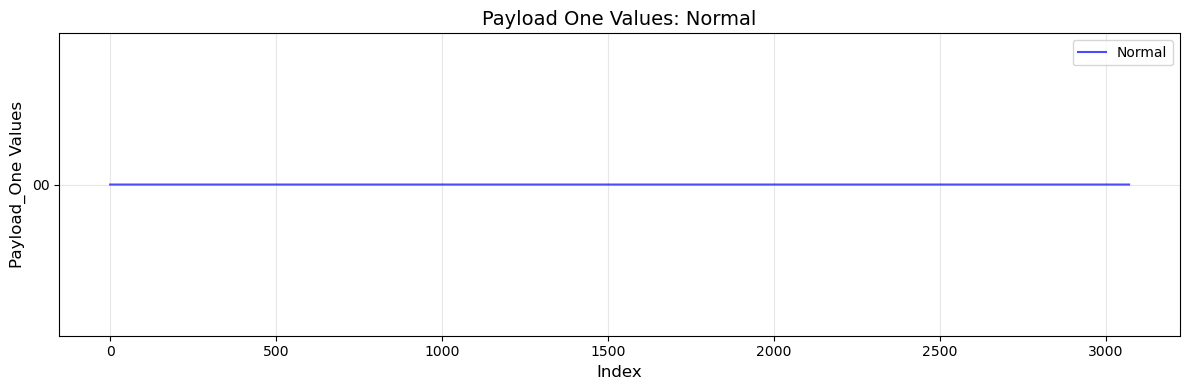

Replay Attacks 1 in Payload One Values:
 Payload_1
00    3035
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack1_counts = pd.value_counts(all_replay_attacks1[payload_column])


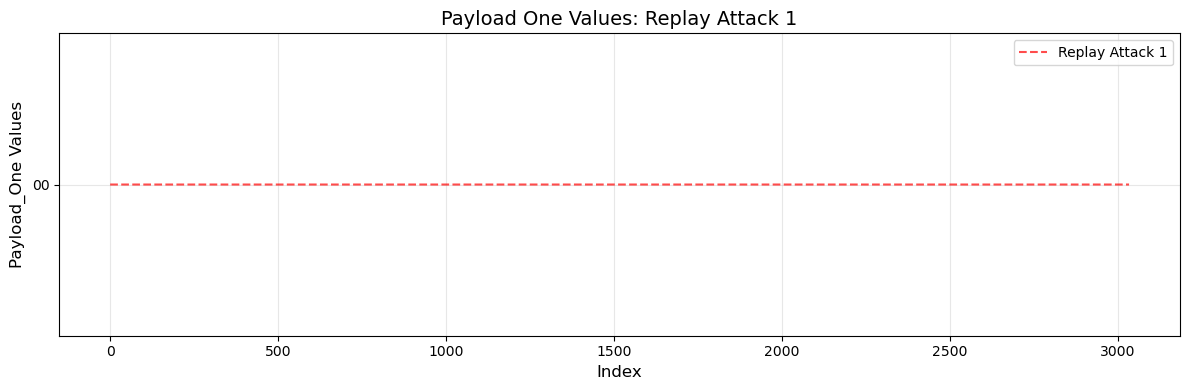

/tmp/ipykernel_55299/458384741.py:34: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack2_counts = pd.value_counts(all_replay_attacks2[payload_column])


Replay Attacks 2 in Payload One Values:
 Payload_1
00    3152
Name: count, dtype: int64


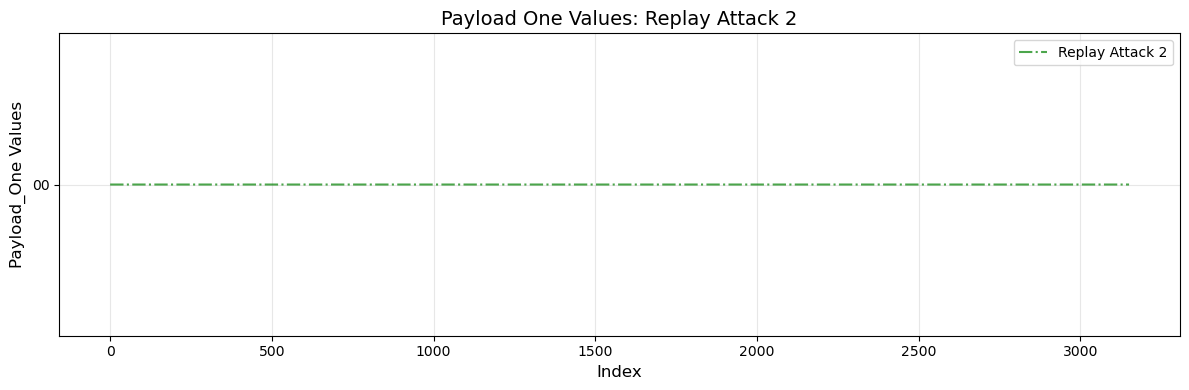

In [54]:
plot_payload_comparison('Payload_1', 'One')

Normal in Payload Two Values:
 Payload_2
00    3070
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  normal_counts = pd.value_counts(All_Normal_df[payload_column])


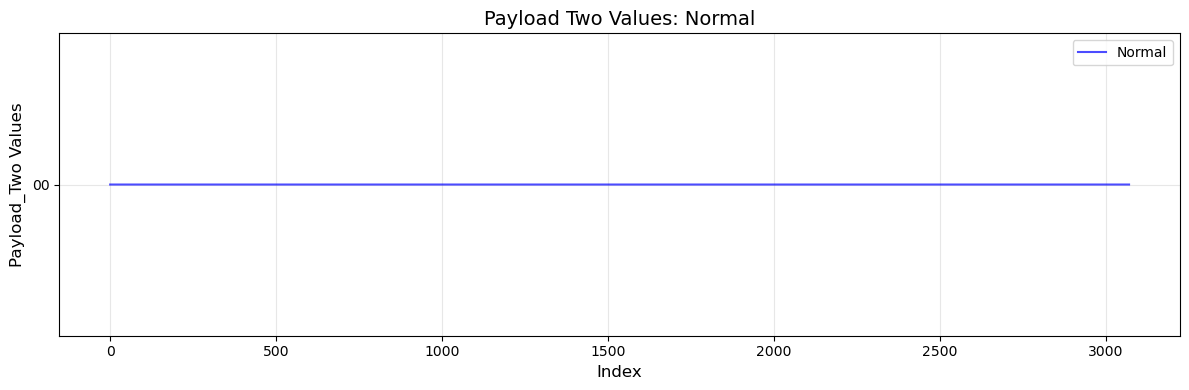

Replay Attacks 1 in Payload Two Values:
 Payload_2
00    3035
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack1_counts = pd.value_counts(all_replay_attacks1[payload_column])


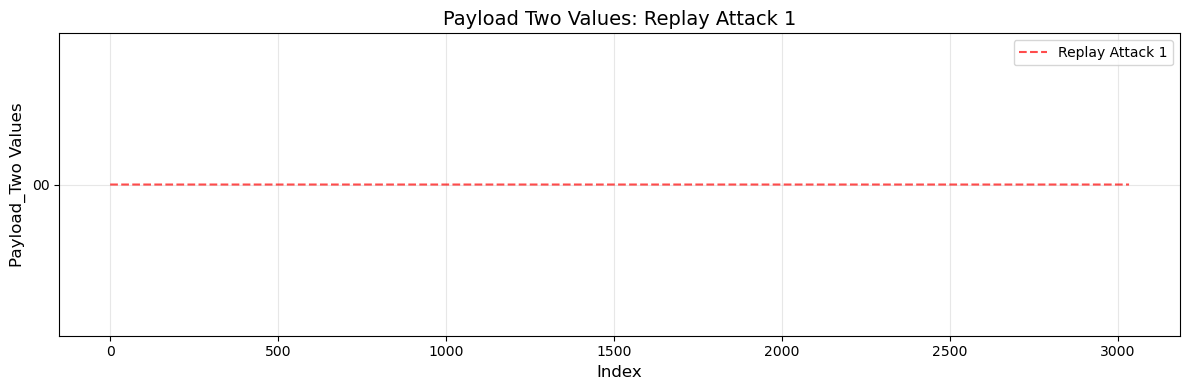

/tmp/ipykernel_55299/458384741.py:34: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack2_counts = pd.value_counts(all_replay_attacks2[payload_column])


Replay Attacks 2 in Payload Two Values:
 Payload_2
00    3152
Name: count, dtype: int64


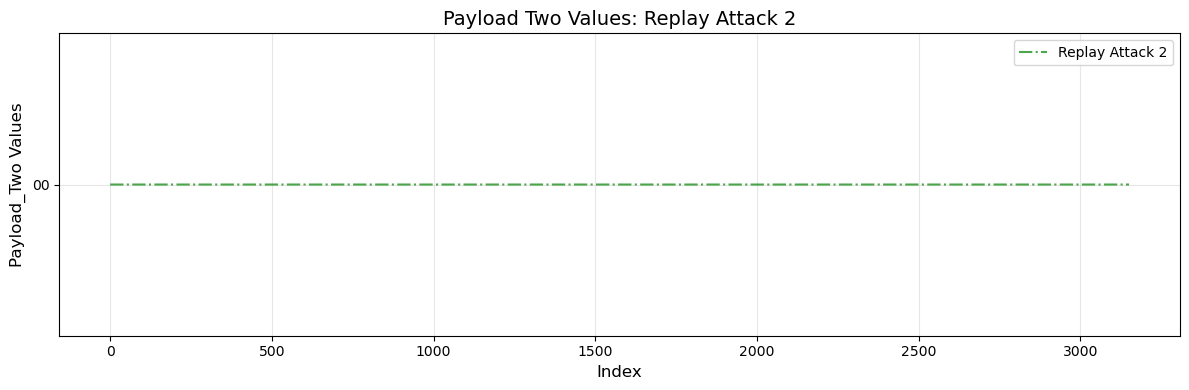

In [55]:
plot_payload_comparison('Payload_2', 'Two')

Normal in Payload Three Values:
 Payload_3
00    1942
12     613
02     360
10     141
13      14
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  normal_counts = pd.value_counts(All_Normal_df[payload_column])


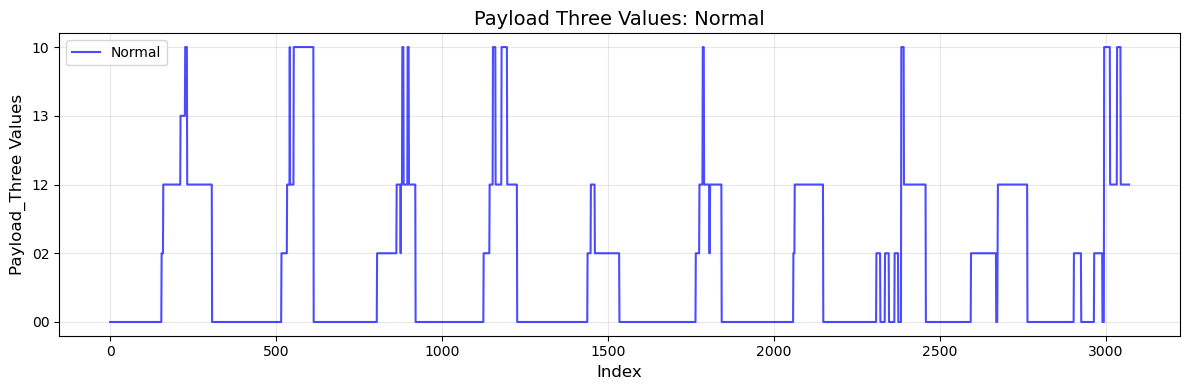

Replay Attacks 1 in Payload Three Values:
 Payload_3
00    2211
12     490
02     193
3F     127
10      14
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack1_counts = pd.value_counts(all_replay_attacks1[payload_column])


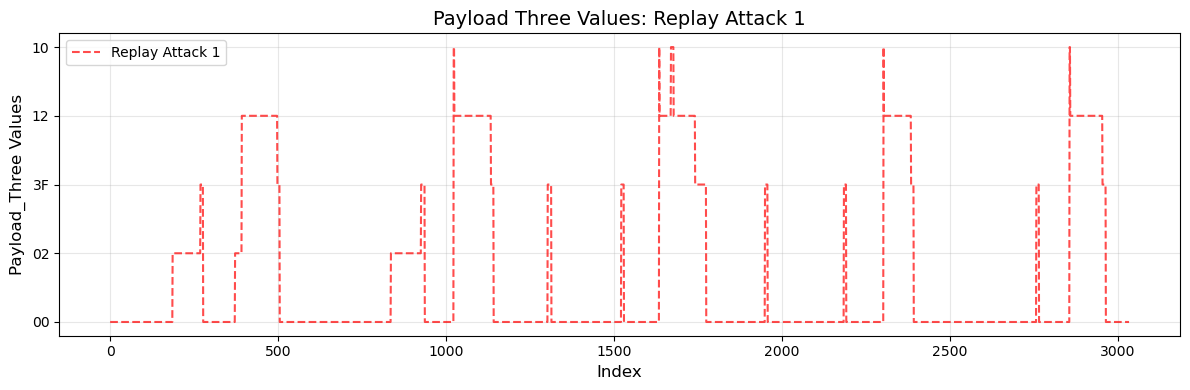

/tmp/ipykernel_55299/458384741.py:34: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack2_counts = pd.value_counts(all_replay_attacks2[payload_column])


Replay Attacks 2 in Payload Three Values:
 Payload_3
00    2032
02     839
10     142
12     139
Name: count, dtype: int64


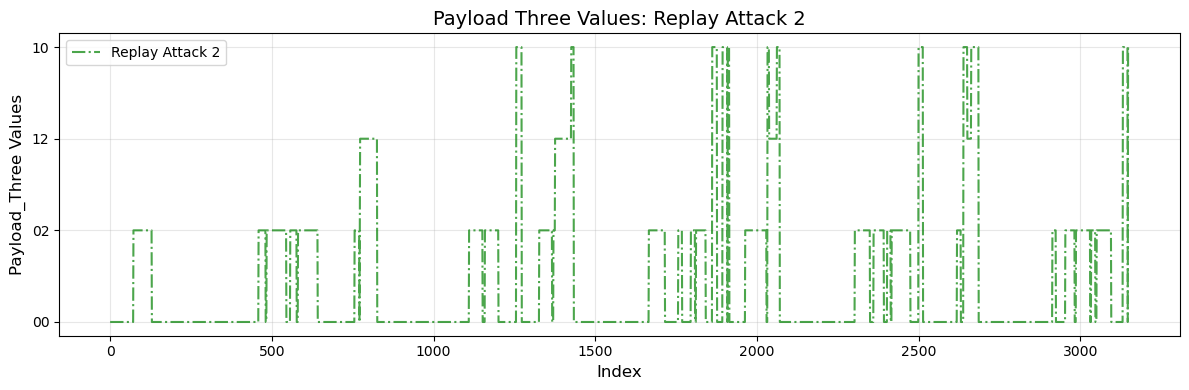

In [56]:
plot_payload_comparison('Payload_3', 'Three')

/tmp/ipykernel_55299/458384741.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  normal_counts = pd.value_counts(All_Normal_df[payload_column])


Normal in Payload Four Values:
 Payload_4
00    3070
Name: count, dtype: int64


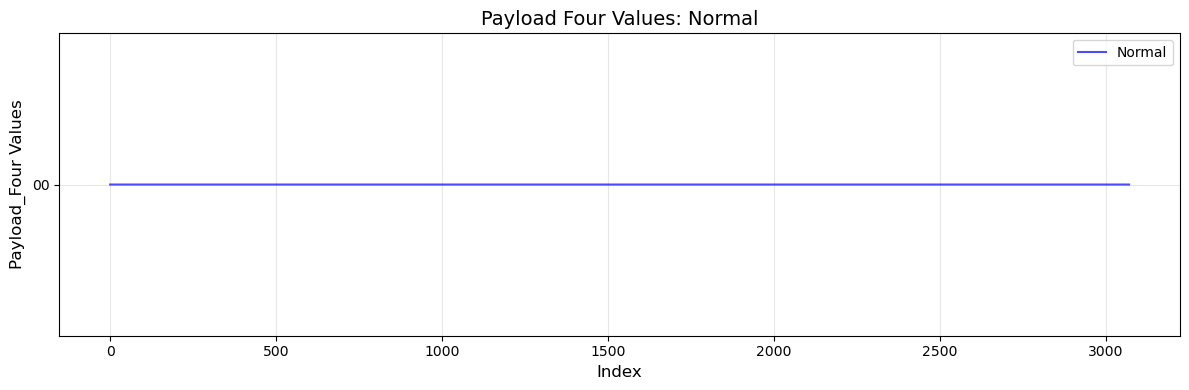

Replay Attacks 1 in Payload Four Values:
 Payload_4
00    3035
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack1_counts = pd.value_counts(all_replay_attacks1[payload_column])


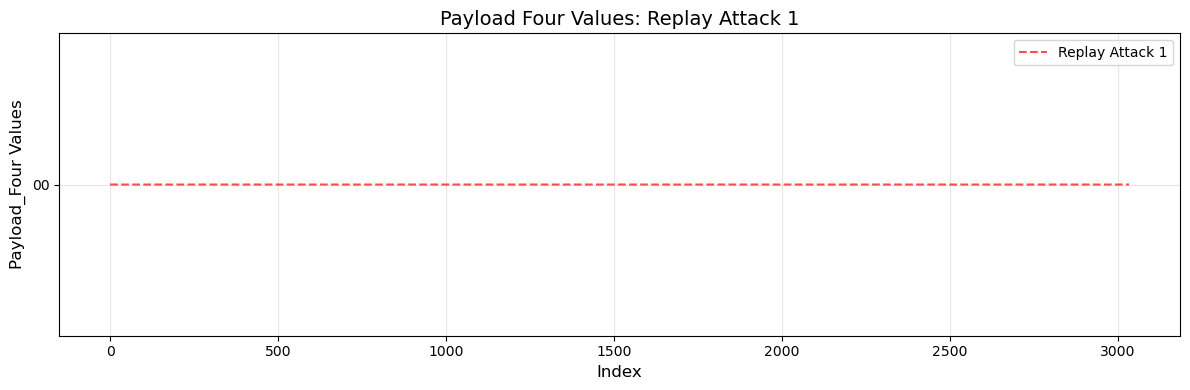

/tmp/ipykernel_55299/458384741.py:34: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack2_counts = pd.value_counts(all_replay_attacks2[payload_column])


Replay Attacks 2 in Payload Four Values:
 Payload_4
00    3152
Name: count, dtype: int64


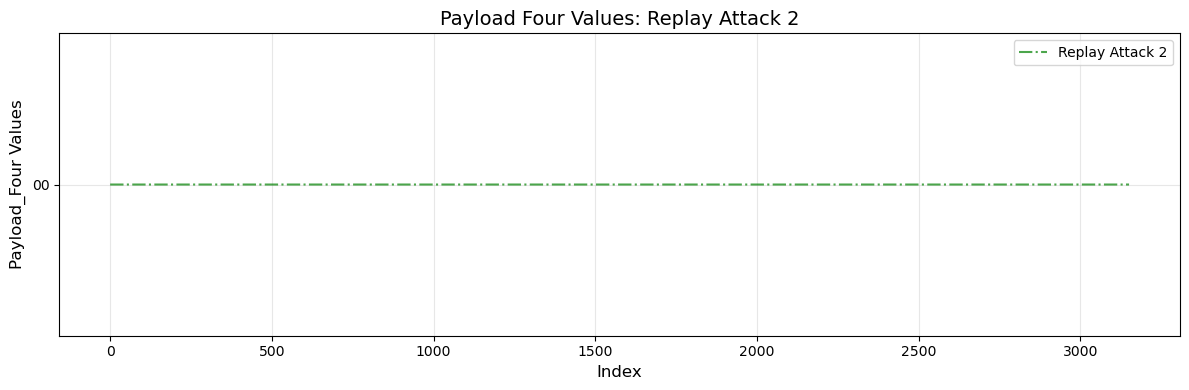

In [57]:
plot_payload_comparison('Payload_4', 'Four')

Normal in Payload Five Values:
 Payload_5
04    1302
08     895
0C     833
00      36
30       4
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  normal_counts = pd.value_counts(All_Normal_df[payload_column])


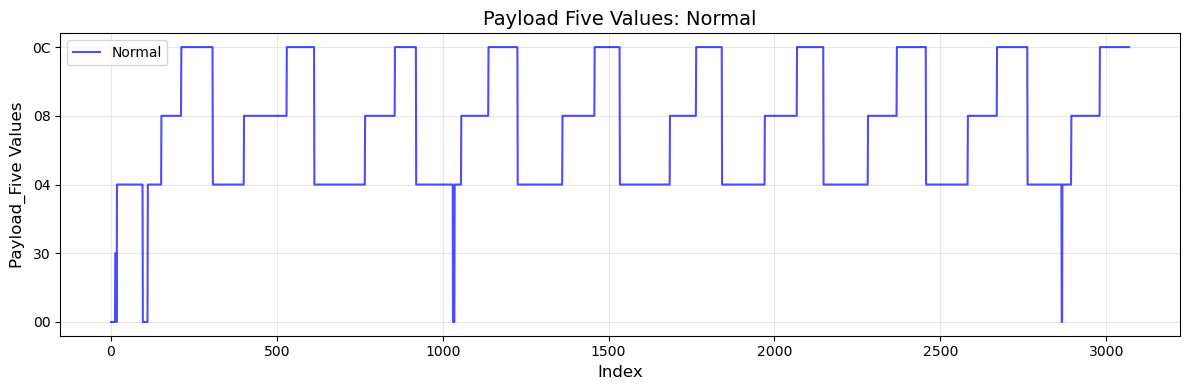

Replay Attacks 1 in Payload Five Values:
 Payload_5
00    1408
08     592
04     525
0C     510
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack1_counts = pd.value_counts(all_replay_attacks1[payload_column])


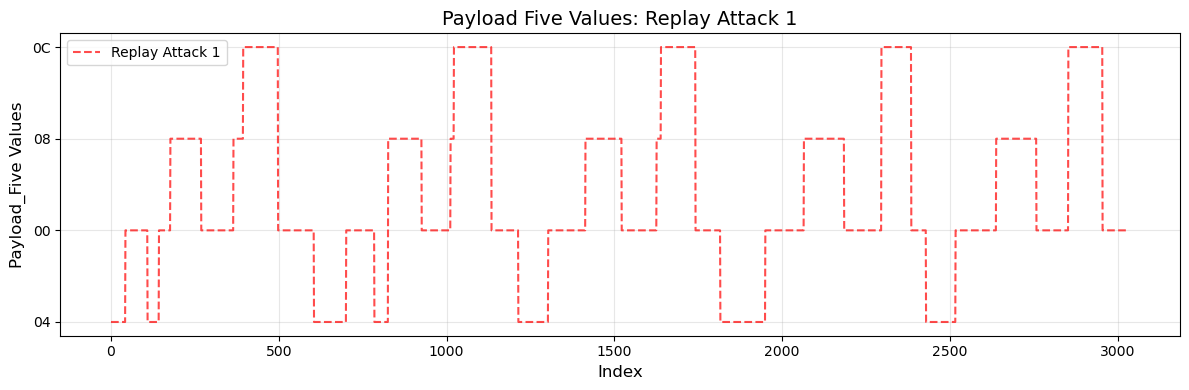

/tmp/ipykernel_55299/458384741.py:34: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack2_counts = pd.value_counts(all_replay_attacks2[payload_column])


Replay Attacks 2 in Payload Five Values:
 Payload_5
08    1408
04    1126
0C     553
00      65
Name: count, dtype: int64


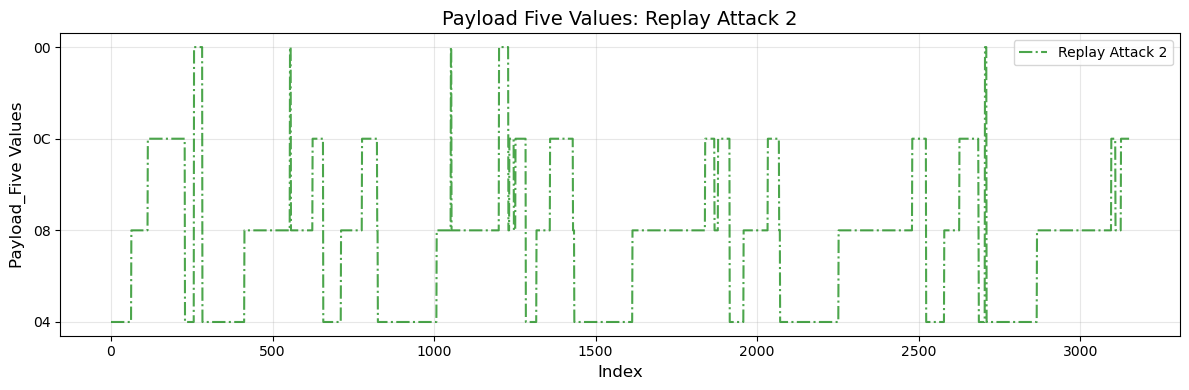

In [58]:
plot_payload_comparison('Payload_5', 'Five')

Normal in Payload Six Values:
 Payload_6
12    1302
14     908
16     820
10      28
00      12
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  normal_counts = pd.value_counts(All_Normal_df[payload_column])


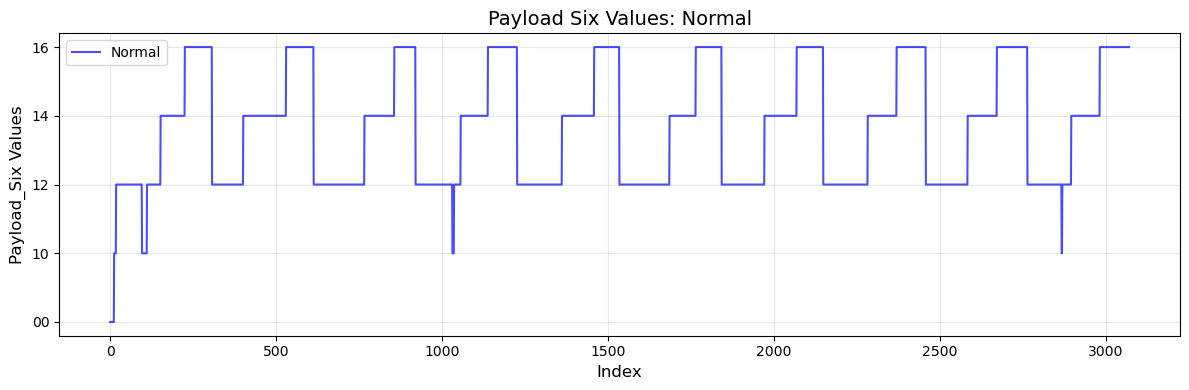

Replay Attacks 1 in Payload Six Values:
 Payload_6
00    958
14    592
12    525
16    510
10    323
1E    127
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack1_counts = pd.value_counts(all_replay_attacks1[payload_column])


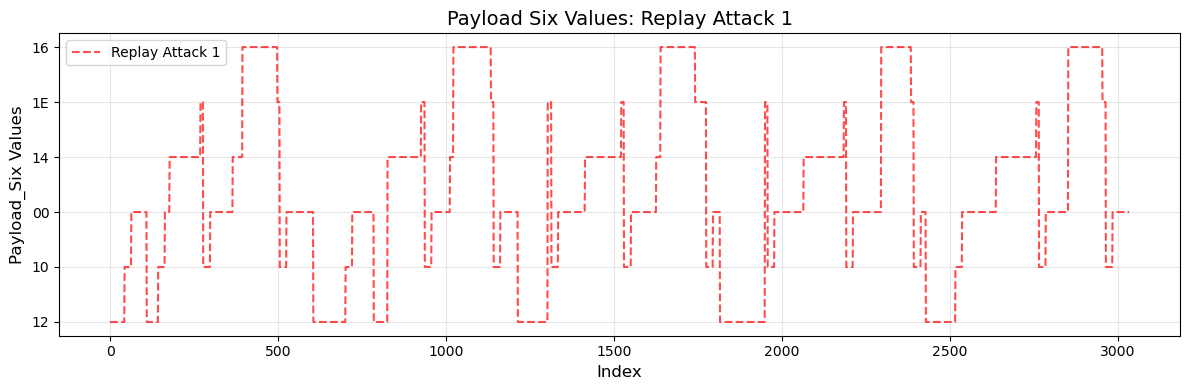

Replay Attacks 2 in Payload Six Values:
 Payload_6
14    1378
12    1135
16     553
10      70
00      15
02       1
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:34: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack2_counts = pd.value_counts(all_replay_attacks2[payload_column])


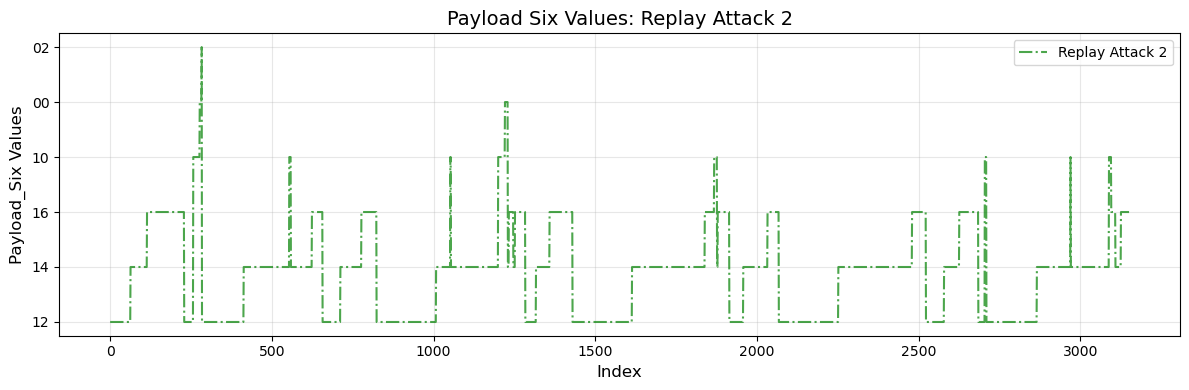

In [59]:
plot_payload_comparison('Payload_6', 'Six')

Normal in Payload Seven Values:
 Payload_7
00    3070
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  normal_counts = pd.value_counts(All_Normal_df[payload_column])


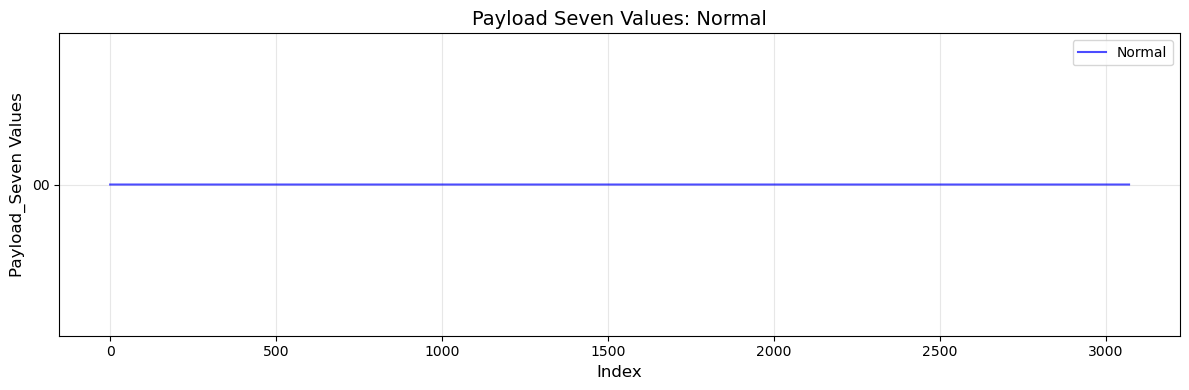

Replay Attacks 1 in Payload Seven Values:
 Payload_7
00    3035
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack1_counts = pd.value_counts(all_replay_attacks1[payload_column])


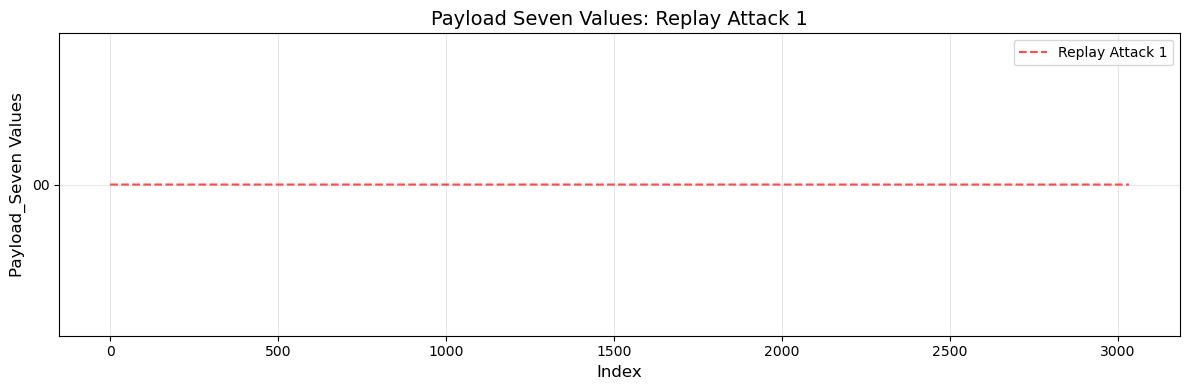

/tmp/ipykernel_55299/458384741.py:34: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack2_counts = pd.value_counts(all_replay_attacks2[payload_column])


Replay Attacks 2 in Payload Seven Values:
 Payload_7
00    3152
Name: count, dtype: int64


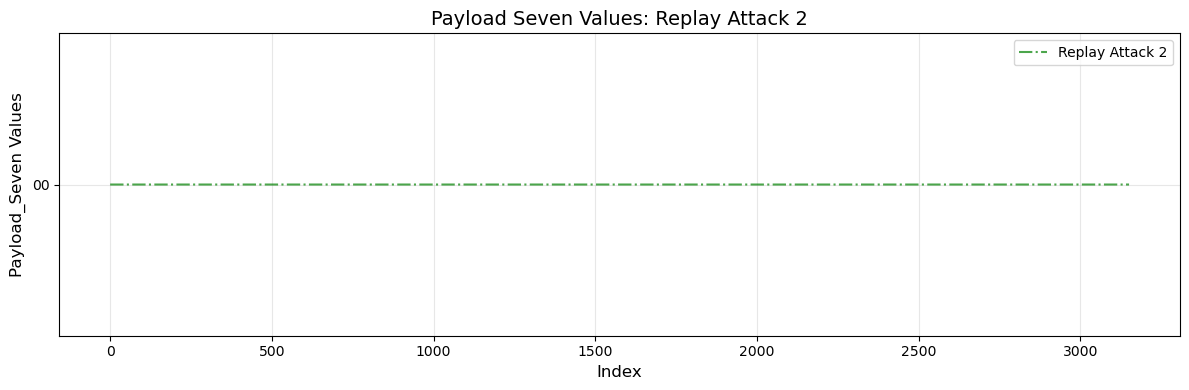

In [60]:
plot_payload_comparison('Payload_7', 'Seven')

Normal in Payload Eight Values:
 Payload_8
00    3070
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:8: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  normal_counts = pd.value_counts(All_Normal_df[payload_column])


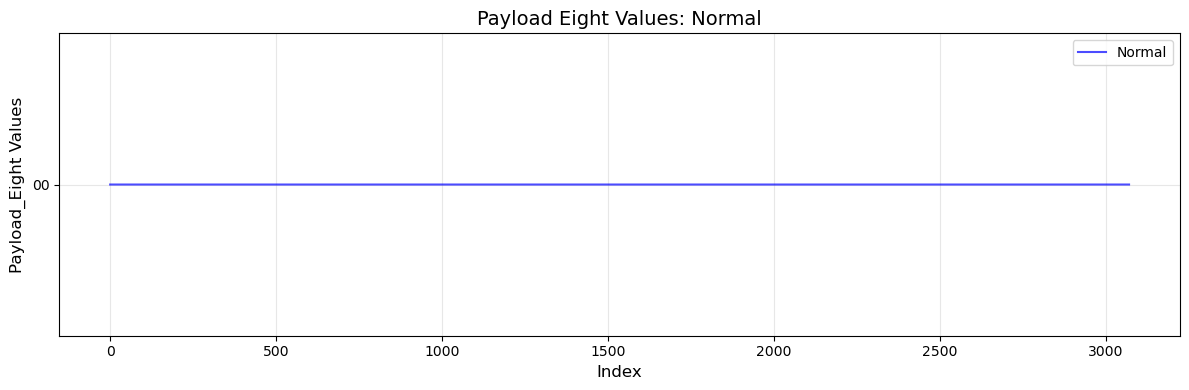

Replay Attacks 1 in Payload Eight Values:
 Payload_8
00    3035
Name: count, dtype: int64


/tmp/ipykernel_55299/458384741.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack1_counts = pd.value_counts(all_replay_attacks1[payload_column])


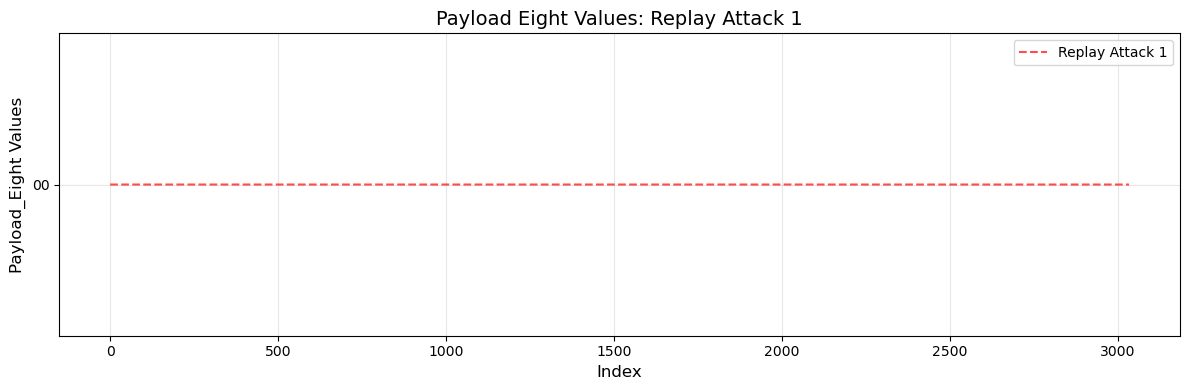

/tmp/ipykernel_55299/458384741.py:34: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  replay_attack2_counts = pd.value_counts(all_replay_attacks2[payload_column])


Replay Attacks 2 in Payload Eight Values:
 Payload_8
00    3152
Name: count, dtype: int64


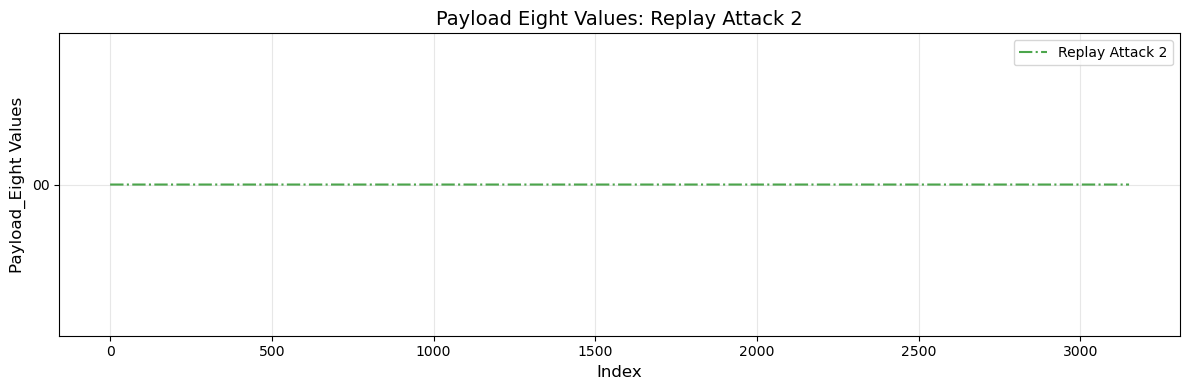

In [61]:
plot_payload_comparison('Payload_8', 'Eight')

In [11]:
Normal = All_Normal_df[["Payload_1",	"Payload_2",	"Payload_3",	"Payload_4",	"Payload_5",	"Payload_6",	"Payload_7",	"Payload_8",	"Time_Gap",	"Label"]]

Attack = all_replay_attacks[["Payload_1",	"Payload_2",	"Payload_3",	"Payload_4",	"Payload_5",	"Payload_6",	"Payload_7",	"Payload_8",	"Time_Gap",	"Label"]]

In [12]:
# Initialize the LabelEncoder and MinMaxScaler
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

# List of categorical columns
categorical_columns = ["Payload_1", "Payload_2", "Payload_3", "Payload_4", 
                       "Payload_5", "Payload_6", "Payload_7", "Payload_8"]

# Apply label encoding to the categorical columns
for col in categorical_columns:
    Normal[col] = label_encoder.fit_transform(Normal[col])

# Apply Min-Max scaling to the encoded columns
Normal[categorical_columns] = scaler.fit_transform(Normal[categorical_columns])

/tmp/ipykernel_43767/120474210.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Normal[col] = label_encoder.fit_transform(Normal[col])
/tmp/ipykernel_43767/120474210.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Normal[col] = label_encoder.fit_transform(Normal[col])
/tmp/ipykernel_43767/120474210.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [13]:
# Initialize the LabelEncoder and MinMaxScaler
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

# List of categorical columns
categorical_columns = ["Payload_1", "Payload_2", "Payload_3", "Payload_4", 
                       "Payload_5", "Payload_6", "Payload_7", "Payload_8"]

# Apply label encoding to the categorical columns
for col in categorical_columns:
    Attack[col] = label_encoder.fit_transform(Attack[col])

# Apply Min-Max scaling to the encoded columns
Attack[categorical_columns] = scaler.fit_transform(Attack[categorical_columns])

/tmp/ipykernel_43767/3827007321.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Attack[col] = label_encoder.fit_transform(Attack[col])
/tmp/ipykernel_43767/3827007321.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Attack[col] = label_encoder.fit_transform(Attack[col])
/tmp/ipykernel_43767/3827007321.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [14]:
Normal

,Payload_1,Payload_2,Payload_3,Payload_4,Payload_5,Payload_6,Payload_7,Payload_8,Time_Gap,Label
0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.4,0
1,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.4,0
2,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.4,0
3,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.4,0
4,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.4,0
...,...,...,...,...,...,...,...,...,...,...
3065,0.0,0.0,0.75,0.0,0.75,1.0,0.0,0.0,0.3,0
3066,0.0,0.0,0.75,0.0,0.75,1.0,0.0,0.0,0.2,0
3067,0.0,0.0,0.75,0.0,0.75,1.0,0.0,0.0,0.2,0
3068,0.0,0.0,0.75,0.0,0.75,1.0,0.0,0.0,0.3,0


In [16]:
def create_chunks(dataframe, label_column, chunk_size):
    """
    Create chunks of data for deep learning input.
    
    Parameters:
    - dataframe (pd.DataFrame): The input data as a DataFrame.
    - label_column (str): The name of the label column.
    - chunk_size (int): The size of each chunk (number of time steps).
    
    Returns:
    - X (np.ndarray): A 3D array of features with shape (num_chunks, chunk_size, num_features).
    - y (np.ndarray): A 1D array of labels with shape (num_chunks,).
    """
    # Extract features and labels
    features = dataframe.drop(columns=[label_column]).values
    labels = dataframe[label_column].values
    
    # Create chunks
    chunks = []
    chunk_labels = []

    for i in range(len(features) - chunk_size + 1):
        chunk = features[i : i + chunk_size]
        chunks.append(chunk)
        # Use the last label in the chunk as the label for the chunk
        chunk_labels.append(labels[i + chunk_size - 1])

    # Convert to numpy arrays
    X = np.array(chunks)
    y = np.array(chunk_labels)
    
    return X, y

In [17]:
chunk_size = 10
X_Normal, y_Normal = create_chunks(Normal, label_column="Label", chunk_size=chunk_size)
X_Attack, y_Attack = create_chunks(Attack, label_column="Label", chunk_size=chunk_size)

In [18]:
# Combine Normal and Attack data
X_combined = np.concatenate((X_Normal, X_Attack), axis=0)
y_combined = np.concatenate((y_Normal, y_Attack), axis=0)

# Split into train+val and test sets (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_combined, y_combined, test_size=0.2, random_state=42, shuffle=True
)

# Split train+val into train and val sets (80% train, 20% val)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42, shuffle=True
)

In [19]:
# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5912, 10, 9)
y_train shape: (5912,)
X_val shape: (1479, 10, 9)
y_val shape: (1479,)
X_test shape: (1848, 10, 9)
y_test shape: (1848,)


In [20]:
# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Labels should be of type long for CrossEntropyLoss
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create TensorDataset for training, validation, and testing
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader for batching
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print the sizes of each DataLoader
print(f"Training set size: {len(train_loader.dataset)}")
print(f"Validation set size: {len(val_loader.dataset)}")
print(f"Test set size: {len(test_loader.dataset)}")

Training set size: 5912
Validation set size: 1479
Test set size: 1848


In [21]:
# Define the GRU model
class GRUClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.2):
        super(GRUClassifier, self).__init__()
        self.gru = nn.GRU(
            input_size=input_size, 
            hidden_size=hidden_size, 
            num_layers=num_layers, 
            batch_first=True, 
            dropout=dropout
        )
        self.fc = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # GRU forward pass
        out, _ = self.gru(x)
        # Use the output of the last GRU cell
        out = out[:, -1, :]
        # Fully connected layer
        out = self.fc(out)
        return self.softmax(out)

# Model parameters
input_size = 9  # Number of features
hidden_size = 128  # GRU hidden layer size
num_layers = 2  # Number of GRU layers
num_classes = 2  # Binary classification
dropout = 0.2

# Initialize the model
model = GRUClassifier(input_size, hidden_size, num_layers, num_classes, dropout)
print(model)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

GRUClassifier(
  (gru): GRU(9, 128, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=128, out_features=2, bias=True)
  (softmax): Softmax(dim=1)
)


In [26]:
def train_model_with_early_stopping(
    model, 
    criterion, 
    optimizer, 
    train_loader, 
    val_loader, 
    num_epochs=10, 
    patience=3, 
    device='cuda', 
    save_path="best_model.pth"
):
    """
    Train the model with early stopping and save the best model.

    Parameters:
    - model: The GRU model
    - criterion: Loss function
    - optimizer: Optimizer
    - train_loader: DataLoader for training data
    - val_loader: DataLoader for validation data
    - num_epochs: Maximum number of epochs
    - patience: Number of epochs to wait before stopping if no improvement
    - device: 'cuda' or 'cpu'
    - save_path: Path to save the best model
    """
    model.to(device)
    best_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        print(f"Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Check for early stopping
        if val_loss < best_loss:
            best_loss = val_loss
            epochs_no_improve = 0
            best_model_state = model.state_dict()  # Save the best model state
            # Save the best model to a file
            torch.save(best_model_state, save_path)
            print(f"Best model saved at epoch {epoch + 1} with validation loss: {best_loss:.4f}")
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered.")
                break

    # Load the best model state
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return model

In [27]:
''' trained_model = train_model_with_early_stopping(
    model, 
    criterion, 
    optimizer, 
    train_loader, 
    val_loader, 
    num_epochs=20, 
    patience=5, 
    device='cuda', 
    save_path="gru_best_model.pth"
)'''

Epoch [1/20], Train Loss: 0.6394, Val Loss: 0.6670
Best model saved at epoch 1 with validation loss: 0.6670
Epoch [2/20], Train Loss: 0.6403, Val Loss: 0.6670
Best model saved at epoch 2 with validation loss: 0.6670
Epoch [3/20], Train Loss: 0.6408, Val Loss: 0.6670
Best model saved at epoch 3 with validation loss: 0.6670
Epoch [4/20], Train Loss: 0.6394, Val Loss: 0.6670
Best model saved at epoch 4 with validation loss: 0.6670
Epoch [5/20], Train Loss: 0.6391, Val Loss: 0.6670
Best model saved at epoch 5 with validation loss: 0.6670
Epoch [6/20], Train Loss: 0.6397, Val Loss: 0.6670
Best model saved at epoch 6 with validation loss: 0.6670
Epoch [7/20], Train Loss: 0.6400, Val Loss: 0.6670
Best model saved at epoch 7 with validation loss: 0.6670
Epoch [8/20], Train Loss: 0.6389, Val Loss: 0.6670
Best model saved at epoch 8 with validation loss: 0.6670
Epoch [9/20], Train Loss: 0.6394, Val Loss: 0.6670
Best model saved at epoch 9 with validation loss: 0.6670
Epoch [10/20], Train Loss: 0

In [36]:
def evaluate_model_results(model, model_path, data_loader, classes, device='cuda'):
    """
    Load a model's state_dict from a .pth file, evaluate it, and generate a confusion matrix, ROC curve, and classification report.
    
    Parameters:
    - model: The model architecture (e.g., GRU, LSTM, etc.)
    - model_path: Path to the saved .pth model file
    - data_loader: DataLoader for validation or test data
    - classes: List of class names
    - device: 'cuda' or 'cpu'

    Returns:
    - None
    """
    # Load the state_dict into the model architecture
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()

    all_labels = []
    all_predictions = []
    all_probs = []

    # Inference
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probs.extend(probabilities.cpu().numpy()[:, 1])  # Probabilities for class 1

    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    all_probs = np.array(all_probs)

    # Confusion Matrix
    cm = confusion_matrix(all_labels, all_predictions)
    print("Confusion Matrix:\n", cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(all_labels, all_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()

    # Classification Report
    print("Classification Report:\n", classification_report(all_labels, all_predictions, target_names=classes))

Confusion Matrix:
 [[ 586   20]
 [   0 1242]]


/tmp/ipykernel_43767/3303724271.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


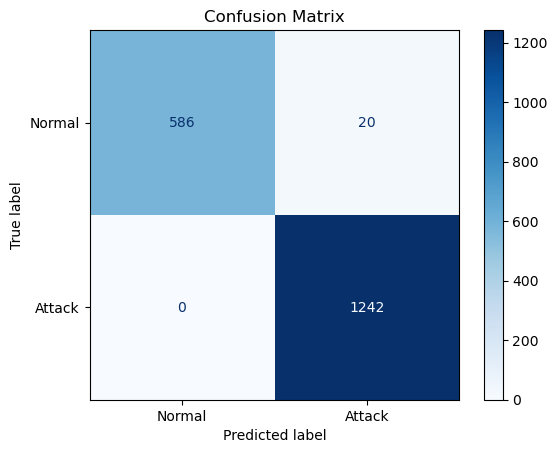

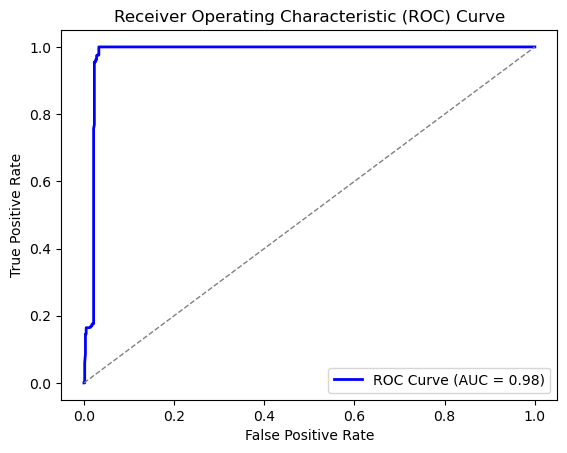

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.97      0.98       606
      Attack       0.98      1.00      0.99      1242

    accuracy                           0.99      1848
   macro avg       0.99      0.98      0.99      1848
weighted avg       0.99      0.99      0.99      1848



In [38]:
# Parameters
model_path = "best_model.pth"  # Path to the saved .pth file
data_loader = test_loader  # Replace with your DataLoader for test data
classes = ["Normal", "Attack"]  # Replace with your class names
device = "cuda" if torch.cuda.is_available() else "cpu"

# Evaluate the model
evaluate_model_results(model, model_path, data_loader, classes, device=device)
